In [26]:
!pip install wolta

In [27]:
import pandas as pd
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset00.csv')

In [28]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [29]:
from wolta.data_tools import col_types

types = col_types(df, print_columns=True)

Target: str
Genetic Markers: str
Autoantibodies: str
Family History: str
Environmental Factors: str
Insulin Levels: int64
Age: int64
BMI: int64
Physical Activity: str
Dietary Habits: str
Blood Pressure: int64
Cholesterol Levels: int64
Waist Circumference: int64
Blood Glucose Levels: int64
Ethnicity: str
Socioeconomic Factors: str
Smoking Status: str
Alcohol Consumption: str
Glucose Tolerance Test: str
History of PCOS: str
Previous Gestational Diabetes: str
Pregnancy History: str
Weight Gain During Pregnancy: int64
Pancreatic Health: int64
Pulmonary Function: int64
Cystic Fibrosis Diagnosis: str
Steroid Use History: str
Genetic Testing: str
Neurological Assessments: int64
Liver Function Tests: str
Digestive Enzyme Levels: int64
Urine Test: str
Birth Weight: int64
Early Onset Symptoms: str


In [30]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [31]:
from wolta.data_tools import unique_amounts

unique_amounts(df)

{'Target': 13,
 'Genetic Markers': 2,
 'Autoantibodies': 2,
 'Family History': 2,
 'Environmental Factors': 2,
 'Insulin Levels': 45,
 'Age': 80,
 'BMI': 28,
 'Physical Activity': 3,
 'Dietary Habits': 2,
 'Blood Pressure': 90,
 'Cholesterol Levels': 200,
 'Waist Circumference': 35,
 'Blood Glucose Levels': 220,
 'Ethnicity': 2,
 'Socioeconomic Factors': 3,
 'Smoking Status': 2,
 'Alcohol Consumption': 3,
 'Glucose Tolerance Test': 2,
 'History of PCOS': 2,
 'Previous Gestational Diabetes': 2,
 'Pregnancy History': 2,
 'Weight Gain During Pregnancy': 40,
 'Pancreatic Health': 90,
 'Pulmonary Function': 60,
 'Cystic Fibrosis Diagnosis': 2,
 'Steroid Use History': 2,
 'Genetic Testing': 2,
 'Neurological Assessments': 3,
 'Liver Function Tests': 2,
 'Digestive Enzyme Levels': 90,
 'Urine Test': 4,
 'Birth Weight': 3000,
 'Early Onset Symptoms': 2}

In [32]:
from wolta.feature_tools import list_deletings

df = list_deletings(df)

The maximum tolerated null value amount is 14000
The maximum tolerated unique value amount is 7000 in string data


In [33]:
from wolta.data_tools import make_numerics

df['Target'], outs = make_numerics(df['Target'], space_requested=True)

print(outs)
outs = list(outs)
print(outs)

{'Steroid-Induced Diabetes': 0, 'Neonatal Diabetes Mellitus (NDM)': 1, 'Prediabetic': 2, 'Type 1 Diabetes': 3, 'Wolfram Syndrome': 4, 'LADA': 5, 'Type 2 Diabetes': 6, 'Wolcott-Rallison Syndrome': 7, 'Secondary Diabetes': 8, 'Type 3c Diabetes (Pancreatogenic Diabetes)': 9, 'Gestational Diabetes': 10, 'Cystic Fibrosis-Related Diabetes (CFRD)': 11, 'MODY': 12}
['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)', 'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA', 'Type 2 Diabetes', 'Wolcott-Rallison Syndrome', 'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)', 'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)', 'MODY']


In [34]:
types = col_types(df)
loc = 0

numerical_features = []

for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])
    else:
        numerical_features.append(col)
    
    loc += 1

In [35]:
df.describe()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,6.027814,0.498557,0.499171,0.502400,0.501257,21.607443,32.020700,24.782943,1.002886,0.499714,...,70.264671,0.498071,0.497971,0.495500,1.804157,0.499729,46.420529,1.503743,3097.061071,0.499157
std,3.748868,0.500001,0.500003,0.499998,0.500002,10.785852,21.043173,6.014236,0.816369,0.500003,...,11.965600,0.500000,0.499999,0.499983,0.680154,0.500003,19.391089,1.117397,713.837300,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,12.000000,0.000000,0.000000,...,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,1500.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,14.000000,20.000000,0.000000,0.000000,...,63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.000000,1.000000,2629.000000,0.000000
50%,6.000000,0.000000,0.000000,1.000000,1.000000,19.000000,31.000000,25.000000,1.000000,0.000000,...,72.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,2.000000,3103.000000,0.000000
75%,9.000000,1.000000,1.000000,1.000000,1.000000,28.000000,49.000000,29.000000,2.000000,1.000000,...,79.000000,1.000000,1.000000,1.000000,2.000000,1.000000,61.000000,3.000000,3656.250000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,49.000000,79.000000,39.000000,2.000000,1.000000,...,89.000000,1.000000,1.000000,1.000000,3.000000,1.000000,99.000000,3.000000,4499.000000,1.000000


In [36]:
from wolta.data_tools import stat_sum

numerical_features.remove('Target')

stat_sum(df,
        ['max', 'min', 'width', 'var', 'med'],
        only=numerical_features)

Insulin Levels
max: 49
min: 5
width: 44
variance: 116.33294174673469
median: 19.0
***
Age
max: 79
min: 0
width: 79
variance: 442.8088143671429
median: 31.0
***
BMI
max: 39
min: 12
width: 27
variance: 36.17051476816326
median: 25.0
***
Blood Pressure
max: 149
min: 60
width: 89
variance: 397.79733921959183
median: 113.0
***
Cholesterol Levels
max: 299
min: 100
width: 199
variance: 1983.1122213028575
median: 191.0
***
Waist Circumference
max: 54
min: 20
width: 34
variance: 46.28641725387755
median: 34.0
***
Blood Glucose Levels
max: 299
min: 80
width: 219
variance: 2319.8868201110204
median: 152.0
***
Weight Gain During Pregnancy
max: 39
min: 0
width: 39
variance: 92.79521571408162
median: 16.0
***
Pancreatic Health
max: 99
min: 10
width: 89
variance: 399.3818442838775
median: 46.0
***
Pulmonary Function
max: 89
min: 30
width: 59
variance: 143.17353474918366
median: 72.0
***
Neurological Assessments
max: 3
min: 1
width: 2
variance: 0.46260271816326537
median: 2.0
***
Digestive Enzyme Leve

In [37]:
y = df['Target'].values
del df['Target']
X = df.values
del df

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

In [39]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X_train, y_train)

# Evaluate and predict
accuracy = model.score(X_test, y_test)
predictions = model.predict(X_test)

Learning rate set to 0.097159
0:	learn: 2.1658441	total: 126ms	remaining: 2m 6s
1:	learn: 1.9263709	total: 247ms	remaining: 2m 3s
2:	learn: 1.7668642	total: 362ms	remaining: 2m
3:	learn: 1.6341815	total: 476ms	remaining: 1m 58s
4:	learn: 1.5169934	total: 591ms	remaining: 1m 57s
5:	learn: 1.4279344	total: 708ms	remaining: 1m 57s
6:	learn: 1.3436914	total: 824ms	remaining: 1m 56s
7:	learn: 1.2761421	total: 940ms	remaining: 1m 56s
8:	learn: 1.2038160	total: 1.05s	remaining: 1m 55s
9:	learn: 1.1491716	total: 1.17s	remaining: 1m 55s
10:	learn: 1.0943955	total: 1.28s	remaining: 1m 55s
11:	learn: 1.0458685	total: 1.41s	remaining: 1m 55s
12:	learn: 1.0013900	total: 1.52s	remaining: 1m 55s
13:	learn: 0.9679229	total: 1.64s	remaining: 1m 55s
14:	learn: 0.9352822	total: 1.75s	remaining: 1m 54s
15:	learn: 0.8984725	total: 1.87s	remaining: 1m 54s
16:	learn: 0.8738176	total: 1.98s	remaining: 1m 54s
17:	learn: 0.8473760	total: 2.09s	remaining: 1m 54s
18:	learn: 0.8247332	total: 2.21s	remaining: 1m 53

In [40]:
print(accuracy)

0.9007857142857143


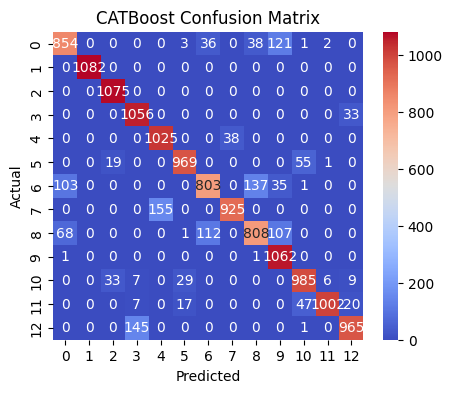

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CATBoost Confusion Matrix")
plt.show()

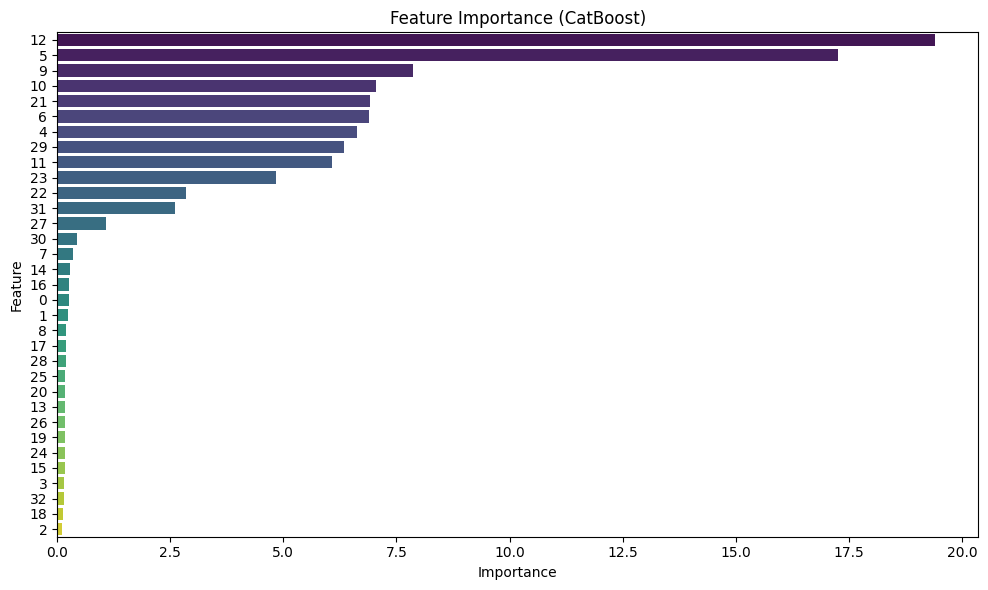

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from CatBoost
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_

# Put into a DataFrame for easier plotting
import pandas as pd
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=fi_df, palette="viridis")
plt.title("Feature Importance (CatBoost)")
plt.tight_layout()
plt.show()

In [43]:
import joblib

joblib.dump(model, "catboost_diabetes_model.pkl")

['catboost_diabetes_model.pkl']

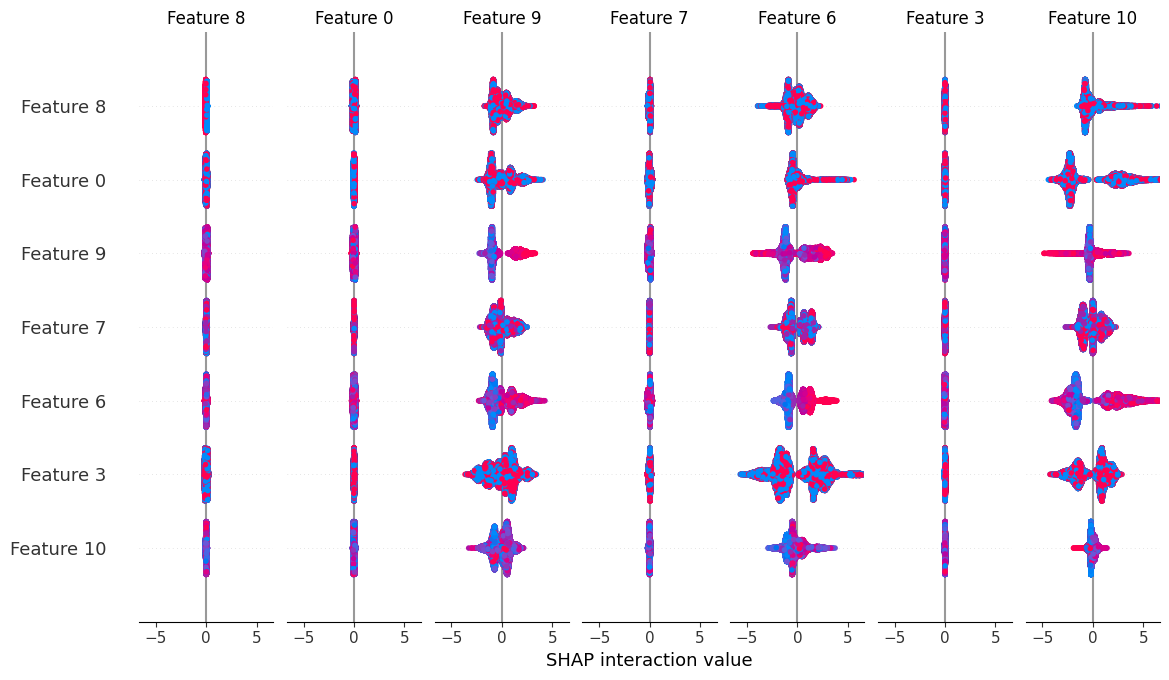

In [68]:
shap.summary_plot(shap_values)
